# Linear Least Squares Regression

Lets plot the data along with this code and see if we can fit a straight line that can approximate the data

Text(0,0.5,'Y')

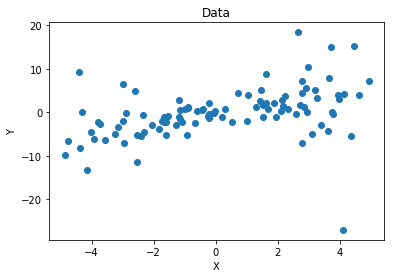

In [70]:
import csv
import matplotlib.pyplot as plt
%matplotlib inline

y_raw = []
x_raw = []

with open('linear_regression_data.csv', newline='') as f:
    reader = csv.reader(f)
    header = True
    for row in reader:
        if header:
            header = False
            continue
        x_raw.append(float(row[0]))
        y_raw.append(float(row[1]))
        
plt.scatter(x_raw,y_raw)
plt.title("Data")
plt.xlabel("X")
plt.ylabel("Y")

Now lets use gradient descent to minimize our objective function. This is the same code used in gradient descent section with some additional fucntions for animations for visualization. Remember that here, x and y are given points and fixed. BETA IS OUR VARIABLE

In [71]:
import numpy as np

y = np.matrix(y_raw).T
x = np.matrix(x_raw).T
ones = np.ones((x.shape[0],1))
x = np.concatenate((ones, x), axis=1)

def animate(i):
    line.set_ydata(np.sin(x + i/10.0))  # update the data
    return line,

# Our function was f(beta) = (Y - beta.X)^T.(Y - beta.X)
def f(beta_k):
    return np.matmul(np.subtract(y,np.matmul(x,beta_k)).T,np.subtract(y,np.matmul(x,beta_k)))

# Gradient is -2*x^T.(Y - beta.X)
def gradient(beta_k): 
    return +2*(np.matmul(-x.T,np.subtract(y,np.matmul(x,beta_k))))

# d_k is direction of descent = -D*gradient(at beta_k) where D is positive definite matrix
def d_k(beta_k, D=None):
    D=np.eye(len(beta_k))
    return -np.matmul(D,gradient(beta_k))

# If you do not get this, ignore it. Just assume that it gives a constant value = c which is alphe
def constant_alpha(c): 
    def alpha(k,x):
        return c 
    return alpha

# The train methos on GradientDescent does the actual work of descending in direction of gradient
class GradientDescent:
    def __init__(self, D=1):
        self.D = D # We set D to be an identity matrix. Whats its dimension?
    
    def train(self, f, d_k, beta_0, alpha=constant_alpha(0.0001), epsilon=1e-8, max_iterations=100):
        # Ignore this mumbo jumbo
        step = 1
        beta = beta_0
        fbeta = f(beta_0)
        fbeta_prev = f(beta_0) - 1
        fbeta_history = [f(beta_0)]
        beta_history = [beta_0]
        while (fbeta[0][0] - fbeta_prev[0][0]) >= epsilon or step <= max_iterations:
            beta_new = beta + alpha(step,beta)*d_k(beta, self.D) # This is the main step
            # beta_(k+1) = beta_k + alpha_k*[-D*gradient(at beta_k)]
            fbeta_prev = fbeta
            fx = f(x_new)
            if step%50 == 0:
                print("At step",step,"x -",beta_new,"f(beta) -",fbeta)
            x_history.append(x_new)
            x=x_new
            fx_history.append(fx)
            step+=1
        return x, x_history, fx_history

def animate(beta_k):
    print(beta_k)
    line.set_ydata(np.add(x*beta_k[1],beta_k[0]))  # update the data
    return line,

def init():
    line.set_ydata(np.ma.array(plot_x, mask=True))
    return line,
    

minimizer = GradientDescent(D = 1)
beta_0 = np.matrix([[1], [10]])
optimal_x, x_history, fx_history = minimizer.train(f, d_k, beta_0)
print("Optimal x -",optimal_x)

At step 50 x - [[ 0.09779588]
 [ 0.87430546]] f(x) - [[ 2817.10825772]]
At step 100 x - [[-0.13509192]
 [ 0.87689394]] f(x) - [[ 2805.47022986]]
Optimal x - [[-0.13509192]
 [ 0.87689394]]


We see that the optimal line is Y = -0.13509192 + 0.87689394*X

Lets visualize it via an animation. Click play button on video below. It shows how the slope of line changes at each time step of gradient descent

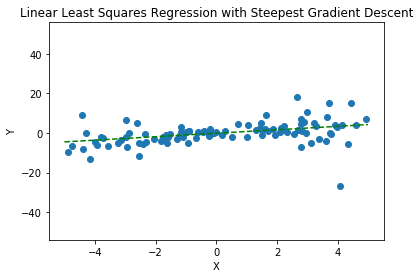

In [72]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import animation, rc
from IPython.display import HTML
rc('animation', html='html5')

fig, ax = plt.subplots()

plot_x = np.matrix(np.arange(-5, 5, 0.01)).T
ones = np.ones((plot_x.shape[0],1))
plot_x_w_ones = np.concatenate((ones, plot_x), axis=1)
line, = ax.plot(plot_x, np.matmul(plot_x_w_ones,x_history[0]),'g--')
ax.scatter(x_raw,y_raw)
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_title("Linear Least Squares Regression with Steepest Gradient Descent") 


def animate(beta_k):
    line.set_ydata(np.dot(plot_x_w_ones,beta_k))  # update the data
    return line,


# Init only required for blitting to give a clean slate.
def init():
    line.set_ydata(np.ma.array(np.arange(-10, 10, 0.01), mask=True))
    return line,

ani = animation.FuncAnimation(fig, animate, x_history, init_func=init,
                              interval=250, blit=True)

HTML(ani.to_html5_video())

Would you get the same result if you found the slope of the line with the equation given in the lecture? Try it